In [1]:
import pandas as pd
import prepare as pr
import modeling as m

In [2]:
from importlib import reload

Imports for some quick exploration and pulling bigrams

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import nltk
import unicodedata
import re
# import modules
import env
from wordcloud import WordCloud

Imports for modeling

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
seed = 42
target = 'language'

In [6]:
reload(pr)

<module 'prepare' from '/Users/zacharystufflebeme/codeup-data-science/NLP/NLP/NLP-Project/Codeup-Mirzakhani-GitHub-Scrape-NLP-Project/zach_docs/prepare.py'>

In [7]:
df = pr.get_clean_df()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   original         432 non-null    object  
 1   first_clean      432 non-null    object  
 2   clean            432 non-null    object  
 3   lemmatized       432 non-null    object  
 4   sentiment        432 non-null    float64 
 5   lem_length       432 non-null    int64   
 6   original_length  432 non-null    int64   
 7   length_diff      432 non-null    int64   
 8   has_#9           432 non-null    int64   
 9   has_tab          432 non-null    int64   
 10  has_parts        432 non-null    int64   
 11  has_fix          432 non-null    int64   
 12  has_x            432 non-null    int64   
 13  has_v            432 non-null    int64   
 14  has_codeblock    432 non-null    int64   
 15  has_image        432 non-null    int64   
 16  language         432 non-null    category
dt

In [9]:
X_train, X_validate, X_test, y_train, y_validate, y_test = pr.split_data(df, explore=False)

In [10]:
X_train

,lemmatized,sentiment,lem_length,original_length,length_diff
271,build status,0.456904,0.000618,0.262251,0.262051
344,designspace designspace prototype design tool ...,0.540160,0.038384,0.027498,0.007324
23,photoshop design build status file root reposi...,0.456904,0.007368,0.075758,0.071957
190,learning adapt structured output semantic segm...,0.498885,0.016951,0.172625,0.163941
22,pyspace glsl fractal ray marcher python instal...,0.456904,0.004276,0.006309,0.004021
...,...,...,...,...,...
220,spacetextwatcher android spacetextwatcher qq qq,0.048725,0.002422,0.114036,0.112836
123,discord,0.238349,0.000361,0.094445,0.094301
242,dljtutorials deeplearningj deeplearningj java ...,0.456904,0.005049,0.467591,0.465166
183,openwispipam image target aopenwispipamcibuild...,0.999837,0.623474,0.633135,0.307696


In [11]:
tfidf = TfidfVectorizer()
X_tfid = tfidf.fit_transform(X_train.lemmatized)
X_tfid_val = tfidf.transform(X_validate.lemmatized)
X_tfid_test = tfidf.transform(X_test.lemmatized)
pd.DataFrame(X_tfid.todense(), 
             columns=tfidf.get_feature_names_out())

,aabb,aaro,ab,ability,abis,able,abramov,absence,absorb,abuild,...,york,youtube,yum,zdepth,zero,zip,ziptar,zodiusinfuser,zoom,zoomrotate
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.098916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.098916
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
237,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
238,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
239,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [12]:
idf_values = pd.Series(
    dict(
        zip(
            tfidf.get_feature_names_out(), tfidf.idf_)))

In [13]:
idf_values.describe()

count    4926.000000
mean        5.502317
std         0.537511
min         2.299283
25%         5.390325
50%         5.795791
75%         5.795791
max         5.795791
dtype: float64

Decision Tree

In [14]:
tree = DecisionTreeClassifier(max_depth=7, random_state=42)
tree.fit(X_tfid, y_train)
tree.score(X_tfid, y_train)

0.6431535269709544

In [15]:
idf_values[idf_values < 4]

action     3.849880
add        3.444415
also       3.270062
andor      3.780888
api        3.598566
             ...   
whether    3.780888
without    2.878020
work       3.087740
working    3.544499
would      3.923988
Length: 141, dtype: float64

In [16]:
import xgboost as xgb

In [17]:
tfidf_bigrams = TfidfVectorizer(ngram_range=(1, 2))
X_tfid_bigrams = tfidf_bigrams.fit_transform(X_train.lemmatized)
pd.DataFrame(X_tfid_bigrams.todense(), 
             columns=tfidf_bigrams.get_feature_names_out())

,aabb,aabb return,aabb scaleamount,aaro,aaro sky,ab,ab noncommercial,ab testing,ability,ability create,...,zip file,zip gamedata,zip tar,ziptar,ziptar file,zodiusinfuser,zoom,zoom inout,zoomrotate,zoomrotate entire
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.068501,0.068501,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.068501,0.068501
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
237,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
238,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
239,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [18]:
idf_bigrams_values = pd.Series(
    dict(
        zip(
            tfidf.get_feature_names_out(), tfidf_bigrams.idf_)))

In [19]:
idf_bigrams_values.describe()

count    4926.000000
mean        5.701240
std         0.315042
min         2.597117
25%         5.795791
50%         5.795791
75%         5.795791
max         5.795791
dtype: float64

In [20]:
tree1 = DecisionTreeClassifier(max_depth=7, random_state=42)
tree1.fit(X_tfid_bigrams, y_train)
tree1.score(X_tfid_bigrams, y_train)

0.6431535269709544

In [21]:
X_tfid.drop(values_to_remove, axis=1)

AttributeError: drop not found

In [ ]:
xg = xgb.XGBClassifier(colsample_bytree = 0.3, learning_rate = 0.2,
                max_depth = 9, alpha = 9, n_estimators = 10, random_state=seed)
xg.fit(X_tfid, y_train_numbers)
xg.score(X_tfid, y_train_numbers)

In [ ]:
xg.score(X_tfid_val, y_validate_numbers)

In [ ]:
## lang_map = {'Java':0, 'C#':1, 'JavaScript':2, 'Python':3}

In [ ]:
y_train_numbers = y_train.map(lang_map)
y_validate_numbers = y_validate.map(lang_map)
y_test_numbers = y_test.map(lang_map)

In [22]:
idf_values[idf_values > 3]

aabb             5.795791
aaro             5.795791
ab               5.390325
ability          4.697178
abis             5.795791
                   ...   
zip              5.102643
ziptar           5.795791
zodiusinfuser    5.795791
zoom             5.795791
zoomrotate       5.795791
Length: 4914, dtype: float64

In [23]:
values_to_remove = idf_values[idf_values > 3].index.tolist()

In [24]:
tfidf1 = TfidfVectorizer(stop_words=values_to_remove)
X_tfid1 = tfidf1.fit_transform(X_train.lemmatized)
X_tfid_val1 = tfidf1.transform(X_validate.lemmatized)
X_tfid_test1 = tfidf1.transform(X_test.lemmatized)
pd.DataFrame(X_tfid1.todense(), 
             columns=tfidf1.get_feature_names_out())

,build,code,file,license,make,new,project,see,use,using,version,without
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.255694,0.534194,0.000000,0.000000,0.754474,0.000000,0.00000,0.000000,0.282890,0.000000
2,0.307461,0.855530,0.296995,0.000000,0.000000,0.000000,0.292114,0.000000,0.00000,0.000000,0.000000,0.000000
3,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
236,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
237,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
238,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
239,0.052272,0.145450,0.555419,0.052745,0.111726,0.219059,0.595954,0.101844,0.12877,0.313631,0.335179,0.107455


In [25]:
pd.Series(
    dict(
        zip(
            tfidf1.get_feature_names_out(), tfidf1.idf_)))

build      2.800058
code       2.597117
file       2.704748
license    2.825376
make       2.992430
new        2.933590
project    2.660296
see        2.727738
use        2.299283
using      2.800058
version    2.992430
without    2.878020
dtype: float64

In [26]:
tree2 = DecisionTreeClassifier(max_depth=7, random_state=42)
tree2.fit(X_tfid1, y_train)
tree2.score(X_tfid1, y_train)

0.5809128630705395

In [27]:
tree2.score(X_tfid_val1, y_validate)

0.38461538461538464

In [28]:
from sklearn.naive_bayes import GaussianNB
classifier1 = GaussianNB()
classifier1.fit(X_tfid.toarray(), y_train)
classifier1.score(X_tfid.toarray(), y_train)

0.941908713692946

In [29]:
classifier1.score(X_tfid_val.toarray(), y_validate)

0.5288461538461539

In [30]:
df

,original,first_clean,clean,lemmatized,sentiment,lem_length,original_length,length_diff,has_#9,has_tab,has_parts,has_fix,has_x,has_v,has_codeblock,has_image,language
0,"<p align=""center""><img src=""https://live.stati...",SpaceX REST API Open Source REST API for lau...,spacex rest api open source rest api launch ro...,spacex rest api open source rest api launch ro...,0.7717,475,7208,6713,0,0,0,0,0,0,0,1,JavaScript
1,\nARCHIVED VERSION OF Space Engineers. This ve...,ARCHIVED VERSION OF Space Engineers. This vers...,archived version engineers version uptodate ve...,archived version engineer version uptodate ver...,0.9633,417,4943,4515,0,0,0,0,0,0,0,0,C#
2,# Spaceship Generator\n\nA Blender script to p...,# Spaceship Generator A Blender script to pro...,spaceship generator blender script procedurall...,spaceship generator blender script procedurall...,0.0000,117,3587,3469,0,0,0,0,0,0,0,0,Python
3,# Spacegray\n\nA set of custom UI themes for S...,# Spacegray A set of custom UI themes for Sub...,spacegray set custom ui themes sublime text hy...,spacegray set custom ui theme sublime text hyp...,0.0000,95,3964,3866,0,0,0,0,0,0,0,0,JavaScript
4,# S P A C E\n\n![cover](resources/space-readme...,# S P A C E ![cover . You can read it here: ...,p c e cover read,p c e cover read,0.0000,16,5705,5689,0,0,0,0,0,0,0,0,JavaScript
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,# Simple multi-dataset detection\nAn object de...,# Simple multi-dataset detection An object det...,simple multidataset detection object detector ...,simple multidataset detection object detector ...,0.9451,374,4046,3671,0,0,0,0,0,0,0,0,Python
428,\n![Python package](https://github.com/WagnerG...,![Python package .,python package,python package,0.0000,14,558,544,0,0,0,0,0,0,0,0,Python
429,# UnityScreenSpaceMetaballs\nScreenSpace Metab...,# UnityScreenSpaceMetaballs ScreenSpace Metaba...,unityscreenspacemetaballs screenspace metaball...,unityscreenspacemetaballs screenspace metaball...,0.0000,126,488,357,0,0,0,0,0,0,0,0,C#
430,Caching for Analytic Computations\n-----------...,Caching for Analytic Computations ------------...,caching analytic computations humans repeat st...,caching analytic computation human repeat stuf...,0.8225,239,1633,1387,0,0,0,0,0,0,0,0,Python


In [31]:
from sklearn.neighbors import KNeighborsClassifier

In [32]:
knn = KNeighborsClassifier?

In [33]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_tfid, y_train)
knn.score(X_tfid, y_train)

0.6473029045643154

In [34]:
knn.score(X_tfid_val, y_validate)

0.16346153846153846

In [35]:
tfidf = TfidfVectorizer()
p = tfidf.fit_transform(X_train.lemmatized)
#X_tfid_val = tfidf.transform(X_validate.lemmatized)
#X_tfid_test = tfidf.transform(X_test.lemmatized)
idf_values = pd.DataFrame(X_tfid.todense(), 
             columns=tfidf.get_feature_names_out())
values_to_remove = idf_values[idf_values > 3].index.tolist()

In [36]:
reload(pr)

<module 'prepare' from '/Users/zacharystufflebeme/codeup-data-science/NLP/NLP/NLP-Project/Codeup-Mirzakhani-GitHub-Scrape-NLP-Project/zach_docs/prepare.py'>

In [37]:
df = pr.get_clean_df()

In [38]:
df

,original,first_clean,clean,lemmatized,sentiment,lem_length,original_length,length_diff,has_#9,has_tab,has_parts,has_fix,has_x,has_v,has_codeblock,has_image,language
0,"<p align=""center""><img src=""https://live.stati...",SpaceX REST API Open Source REST API for lau...,spacex rest api open source rest api launch ro...,spacex rest api open source rest api launch ro...,0.7717,475,7208,6713,0,0,0,0,0,0,0,1,JavaScript
1,\nARCHIVED VERSION OF Space Engineers. This ve...,ARCHIVED VERSION OF Space Engineers. This vers...,archived version engineers version uptodate ve...,archived version engineer version uptodate ver...,0.9633,417,4943,4515,0,0,0,0,0,0,0,0,C#
2,# Spaceship Generator\n\nA Blender script to p...,# Spaceship Generator A Blender script to pro...,spaceship generator blender script procedurall...,spaceship generator blender script procedurall...,0.0000,117,3587,3469,0,0,0,0,0,0,0,0,Python
3,# Spacegray\n\nA set of custom UI themes for S...,# Spacegray A set of custom UI themes for Sub...,spacegray set custom ui themes sublime text hy...,spacegray set custom ui theme sublime text hyp...,0.0000,95,3964,3866,0,0,0,0,0,0,0,0,JavaScript
4,# S P A C E\n\n![cover](resources/space-readme...,# S P A C E ![cover . You can read it here: ...,p c e cover read,p c e cover read,0.0000,16,5705,5689,0,0,0,0,0,0,0,0,JavaScript
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,# Simple multi-dataset detection\nAn object de...,# Simple multi-dataset detection An object det...,simple multidataset detection object detector ...,simple multidataset detection object detector ...,0.9451,374,4046,3671,0,0,0,0,0,0,0,0,Python
428,\n![Python package](https://github.com/WagnerG...,![Python package .,python package,python package,0.0000,14,558,544,0,0,0,0,0,0,0,0,Python
429,# UnityScreenSpaceMetaballs\nScreenSpace Metab...,# UnityScreenSpaceMetaballs ScreenSpace Metaba...,unityscreenspacemetaballs screenspace metaball...,unityscreenspacemetaballs screenspace metaball...,0.0000,126,488,357,0,0,0,0,0,0,0,0,C#
430,Caching for Analytic Computations\n-----------...,Caching for Analytic Computations ------------...,caching analytic computations humans repeat st...,caching analytic computation human repeat stuf...,0.8225,239,1633,1387,0,0,0,0,0,0,0,0,Python


In [39]:
df['original_length'] = df.original.str.len()
df['clean_length'] = df.clean.str.len()
df['length_diff'] = df.original_length - df.clean_length

In [40]:
df

,original,first_clean,clean,lemmatized,sentiment,lem_length,original_length,length_diff,has_#9,has_tab,has_parts,has_fix,has_x,has_v,has_codeblock,has_image,language,clean_length
0,"<p align=""center""><img src=""https://live.stati...",SpaceX REST API Open Source REST API for lau...,spacex rest api open source rest api launch ro...,spacex rest api open source rest api launch ro...,0.7717,475,7208,6713,0,0,0,0,0,0,0,1,JavaScript,495
1,\nARCHIVED VERSION OF Space Engineers. This ve...,ARCHIVED VERSION OF Space Engineers. This vers...,archived version engineers version uptodate ve...,archived version engineer version uptodate ver...,0.9633,417,4943,4515,0,0,0,0,0,0,0,0,C#,428
2,# Spaceship Generator\n\nA Blender script to p...,# Spaceship Generator A Blender script to pro...,spaceship generator blender script procedurall...,spaceship generator blender script procedurall...,0.0000,117,3587,3469,0,0,0,0,0,0,0,0,Python,118
3,# Spacegray\n\nA set of custom UI themes for S...,# Spacegray A set of custom UI themes for Sub...,spacegray set custom ui themes sublime text hy...,spacegray set custom ui theme sublime text hyp...,0.0000,95,3964,3866,0,0,0,0,0,0,0,0,JavaScript,98
4,# S P A C E\n\n![cover](resources/space-readme...,# S P A C E ![cover . You can read it here: ...,p c e cover read,p c e cover read,0.0000,16,5705,5689,0,0,0,0,0,0,0,0,JavaScript,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,# Simple multi-dataset detection\nAn object de...,# Simple multi-dataset detection An object det...,simple multidataset detection object detector ...,simple multidataset detection object detector ...,0.9451,374,4046,3671,0,0,0,0,0,0,0,0,Python,375
428,\n![Python package](https://github.com/WagnerG...,![Python package .,python package,python package,0.0000,14,558,544,0,0,0,0,0,0,0,0,Python,14
429,# UnityScreenSpaceMetaballs\nScreenSpace Metab...,# UnityScreenSpaceMetaballs ScreenSpace Metaba...,unityscreenspacemetaballs screenspace metaball...,unityscreenspacemetaballs screenspace metaball...,0.0000,126,488,357,0,0,0,0,0,0,0,0,C#,131
430,Caching for Analytic Computations\n-----------...,Caching for Analytic Computations ------------...,caching analytic computations humans repeat st...,caching analytic computation human repeat stuf...,0.8225,239,1633,1387,0,0,0,0,0,0,0,0,Python,246


In [41]:
import numpy as np

In [42]:
df['has_#9'] = np.where(df.clean.str.contains('&#9;'), 1, 0)
df['has_parts'] = np.where((df.clean.str.contains(' parts ')) | (df.clean.str.contains(' parts ')), 1, 0)
df['has_fix'] = np.where(df.clean.str.contains(' fix '), 1, 0)
df['has_tab'] = np.where(df.clean.str.contains(' tab '), 1, 0)
df['has_x'] = np.where(df.clean.str.contains(' x '), 1, 0)
df['has_v'] = np.where(df.clean.str.contains(' v '), 1, 0)
df['has_codeblock'] = np.where(df.clean.str.contains('codeblock'), 1, 0)
df['has_image'] = np.where(df.clean.str.contains('image'), 1, 0)

In [43]:
df

,original,first_clean,clean,lemmatized,sentiment,lem_length,original_length,length_diff,has_#9,has_tab,has_parts,has_fix,has_x,has_v,has_codeblock,has_image,language,clean_length
0,"<p align=""center""><img src=""https://live.stati...",SpaceX REST API Open Source REST API for lau...,spacex rest api open source rest api launch ro...,spacex rest api open source rest api launch ro...,0.7717,475,7208,6713,0,0,0,0,0,0,0,1,JavaScript,495
1,\nARCHIVED VERSION OF Space Engineers. This ve...,ARCHIVED VERSION OF Space Engineers. This vers...,archived version engineers version uptodate ve...,archived version engineer version uptodate ver...,0.9633,417,4943,4515,0,0,0,0,0,0,0,0,C#,428
2,# Spaceship Generator\n\nA Blender script to p...,# Spaceship Generator A Blender script to pro...,spaceship generator blender script procedurall...,spaceship generator blender script procedurall...,0.0000,117,3587,3469,0,0,0,0,0,0,0,0,Python,118
3,# Spacegray\n\nA set of custom UI themes for S...,# Spacegray A set of custom UI themes for Sub...,spacegray set custom ui themes sublime text hy...,spacegray set custom ui theme sublime text hyp...,0.0000,95,3964,3866,0,0,0,0,0,0,0,0,JavaScript,98
4,# S P A C E\n\n![cover](resources/space-readme...,# S P A C E ![cover . You can read it here: ...,p c e cover read,p c e cover read,0.0000,16,5705,5689,0,0,0,0,0,0,0,0,JavaScript,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,# Simple multi-dataset detection\nAn object de...,# Simple multi-dataset detection An object det...,simple multidataset detection object detector ...,simple multidataset detection object detector ...,0.9451,374,4046,3671,0,0,0,0,0,0,0,0,Python,375
428,\n![Python package](https://github.com/WagnerG...,![Python package .,python package,python package,0.0000,14,558,544,0,0,0,0,0,0,0,0,Python,14
429,# UnityScreenSpaceMetaballs\nScreenSpace Metab...,# UnityScreenSpaceMetaballs ScreenSpace Metaba...,unityscreenspacemetaballs screenspace metaball...,unityscreenspacemetaballs screenspace metaball...,0.0000,126,488,357,0,0,0,0,0,0,0,0,C#,131
430,Caching for Analytic Computations\n-----------...,Caching for Analytic Computations ------------...,caching analytic computations humans repeat st...,caching analytic computation human repeat stuf...,0.8225,239,1633,1387,0,0,0,0,0,0,0,0,Python,246


In [44]:
df.columns

Index(['original', 'first_clean', 'clean', 'lemmatized', 'sentiment',
       'lem_length', 'original_length', 'length_diff', 'has_#9', 'has_tab',
       'has_parts', 'has_fix', 'has_x', 'has_v', 'has_codeblock', 'has_image',
       'language', 'clean_length'],
      dtype='object')

In [45]:
new_order = ['original', 'first_clean', 'clean', 'lemmatized', 'sentiment',\
        'original_length', 'length_diff', 'has_#9', 'has_tab',\
        'has_parts', 'has_fix', 'has_x', 'has_v',\
       'has_codeblock', 'has_image', 'language']

In [46]:
df = df[new_order]

In [47]:
df

,original,first_clean,clean,lemmatized,sentiment,original_length,length_diff,has_#9,has_tab,has_parts,has_fix,has_x,has_v,has_codeblock,has_image,language
0,"<p align=""center""><img src=""https://live.stati...",SpaceX REST API Open Source REST API for lau...,spacex rest api open source rest api launch ro...,spacex rest api open source rest api launch ro...,0.7717,7208,6713,0,0,0,0,0,0,0,1,JavaScript
1,\nARCHIVED VERSION OF Space Engineers. This ve...,ARCHIVED VERSION OF Space Engineers. This vers...,archived version engineers version uptodate ve...,archived version engineer version uptodate ver...,0.9633,4943,4515,0,0,0,0,0,0,0,0,C#
2,# Spaceship Generator\n\nA Blender script to p...,# Spaceship Generator A Blender script to pro...,spaceship generator blender script procedurall...,spaceship generator blender script procedurall...,0.0000,3587,3469,0,0,0,0,0,0,0,0,Python
3,# Spacegray\n\nA set of custom UI themes for S...,# Spacegray A set of custom UI themes for Sub...,spacegray set custom ui themes sublime text hy...,spacegray set custom ui theme sublime text hyp...,0.0000,3964,3866,0,0,0,0,0,0,0,0,JavaScript
4,# S P A C E\n\n![cover](resources/space-readme...,# S P A C E ![cover . You can read it here: ...,p c e cover read,p c e cover read,0.0000,5705,5689,0,0,0,0,0,0,0,0,JavaScript
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,# Simple multi-dataset detection\nAn object de...,# Simple multi-dataset detection An object det...,simple multidataset detection object detector ...,simple multidataset detection object detector ...,0.9451,4046,3671,0,0,0,0,0,0,0,0,Python
428,\n![Python package](https://github.com/WagnerG...,![Python package .,python package,python package,0.0000,558,544,0,0,0,0,0,0,0,0,Python
429,# UnityScreenSpaceMetaballs\nScreenSpace Metab...,# UnityScreenSpaceMetaballs ScreenSpace Metaba...,unityscreenspacemetaballs screenspace metaball...,unityscreenspacemetaballs screenspace metaball...,0.0000,488,357,0,0,0,0,0,0,0,0,C#
430,Caching for Analytic Computations\n-----------...,Caching for Analytic Computations ------------...,caching analytic computations humans repeat st...,caching analytic computation human repeat stuf...,0.8225,1633,1387,0,0,0,0,0,0,0,0,Python


In [48]:
import seaborn as sns

<AxesSubplot:xlabel='Count', ylabel='original_length'>

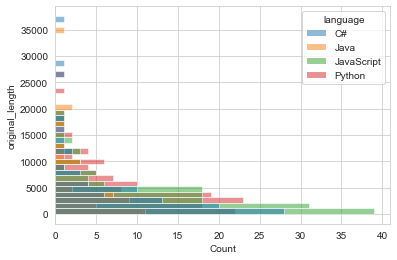

In [49]:
sns.histplot(data=df, y='original_length', hue='language')

<AxesSubplot:xlabel='Count', ylabel='length_diff'>

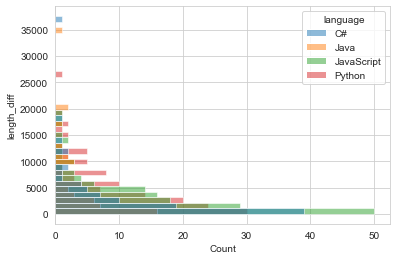

In [50]:
sns.histplot(data=df, y='length_diff', hue='language')

In [51]:
del 

SyntaxError: invalid syntax (370647077.py, line 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_validate, X_test, y_train, y_validate, y_test = pr.split_data(df, explore=False)

In [ ]:
tv = TfidfVectorizer()
XT_train = tv.fit_transform(X_train.lemmatized)
XT_val = tv.transform(X_validate.lemmatized)
XT_test = tv.transform(X_test.lemmatized)
pd.DataFrame(XT_train.todense(), 
             columns=tv.get_feature_names_out()).head(1)

In [ ]:
idf_values = pd.Series(
    dict(
        zip(
            tv.get_feature_names_out(), tv.idf_)))
#values_to_remove = idf_values[idf_values > 3].index.tolist()

In [ ]:
idf_values.describe()

In [ ]:
# 5.65 -> sweet spot
values_to_remove = idf_values[idf_values > 5.65].index.tolist()

In [52]:
tv = TfidfVectorizer(stop_words=values_to_remove)
XT_train = tv.fit_transform(X_train.lemmatized)
XT_validate = tv.transform(X_validate.lemmatized)
XT_test = tv.transform(X_test.lemmatized)
pd.DataFrame(XT_train.todense(), 
             columns=tv.get_feature_names_out()).head(1)

,aabb,aaro,ab,ability,abis,able,abramov,absence,absorb,abuild,...,york,youtube,yum,zdepth,zero,zip,ziptar,zodiusinfuser,zoom,zoomrotate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
XT_train

<241x4926 sparse matrix of type '<class 'numpy.float64'>'
	with 11514 stored elements in Compressed Sparse Row format>

In [54]:
tree = DecisionTreeClassifier(max_depth=6, random_state=42)
tree.fit(XT_train, y_train)
tree.score(XT_train, y_train)

0.6265560165975104

In [55]:
tree.score(XT_val, y_validate)

NameError: name 'XT_val' is not defined

In [ ]:
XF_train = X_train.iloc[:, 4:].copy()
XF_validate = X_validate.iloc[:, 4:].copy()
XF_test = X_test.iloc[:, 4:].copy()

In [ ]:
# scale
to_scale = ['sentiment', 'original_length',  'length_diff','clean_length']
sc = MinMaxScaler()
sc.fit(XF_train[to_scale])
XF_train[to_scale] = sc.transform(XF_train[to_scale])
XF_validate[to_scale] = sc.transform(XF_validate[to_scale])
XF_test[to_scale] = sc.transform(XF_test[to_scale])

In [56]:
X_train_complete = pd.concat([XF_train, pd.DataFrame(XT_train.todense(), columns=tv.get_feature_names_out(), index=XF_train.index)], 
          axis=1)
X_validate_complete = pd.concat([XF_validate, pd.DataFrame(XT_validate.todense(), columns=tv.get_feature_names_out(), index=XF_validate.index)], 
          axis=1)
X_test_complete = pd.concat([XF_test, pd.DataFrame(XT_test.todense(), columns=tv.get_feature_names_out(), index=XF_test.index)], 
          axis=1)

NameError: name 'XF_train' is not defined

In [57]:
X_train.shape, XT_train.shape, XF_train.shape

NameError: name 'XF_train' is not defined

In [58]:
# complete set: bag of words + feature eng
tree = DecisionTreeClassifier(max_depth=6, random_state=42)
tree.fit(X_train_complete, y_train)
tree.score(X_train_complete, y_train)

NameError: name 'X_train_complete' is not defined

In [59]:
tree.score(X_validate_complete, y_validate)

NameError: name 'X_validate_complete' is not defined

In [60]:
# complete set: bag of words + feature eng
tree = DecisionTreeClassifier(max_depth=6, random_state=42)
tree.fit(XT_train, y_train)
tree.score(XT_train, y_train)

0.6265560165975104

In [61]:
X_train_complete

NameError: name 'X_train_complete' is not defined

In [62]:
X_validate_complete

NameError: name 'X_validate_complete' is not defined

In [63]:
# engineered features only
tree = DecisionTreeClassifier(max_depth=3, random_state=42)
tree.fit(X_train1, y_train)
tree.score(X_train1, y_train)

NameError: name 'X_train1' is not defined

In [64]:
tree.score(X_validate1, y_validate)

NameError: name 'X_validate1' is not defined

In [65]:
'part' in values_to_remove

False

In [66]:
y_train.value_counts(normalize=True)

JavaScript    0.352697
Python        0.319502
C#            0.215768
Java          0.112033
Name: language, dtype: float64

In [67]:
X_train_complete

NameError: name 'X_train_complete' is not defined

In [ ]:
a = m.gen_decision_trees(X_train_complete,y_train,X_validate_complete,y_validate)

In [ ]:
a